In [174]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline

In [175]:
adult_train=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                   names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
                          'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])

In [176]:
adult_test=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                   names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
                          'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'], skiprows = 1)

In [229]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [230]:
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [231]:
adult = pd.concat([adult_test,adult_train], axis = 0)
adult.reset_index(inplace = True, drop = True)

In [232]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
Age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [241]:
# Setting all the categorical columns to type category
for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')
    
print('Columns and their types')
print(adult.info())

Columns and their types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
Age               48842 non-null int64
workclass         48842 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education_num     48842 non-null int64
marital_status    48842 non-null category
occupation        48842 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null category
income            48842 non-null category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None


In [242]:
adult.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [243]:
adult.describe()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [244]:
#to find the missing values
print('missing values are:')
for i,j in zip(adult.columns,(adult.values.astype(str) == ' ?').sum(axis = 0)):
        if j > 0:
            print(str(i) + ': ' + str(j) + ' records')

missing values are:
workclass: 2799 records
occupation: 2809 records
native_country: 857 records


In [203]:
#Treating Missing Values by predicting them
"""I fill the missing values in each of the three columns by predicting their values.For each of the three columns, I use all the attributes (including 'income') as independent variables and treat that column as the dependent variable, making it a multi-class classification task. I use classification algorithms, logistic regression to predict the class when the value is missing (in this case a ' ?')."""

"I fill the missing values in each of the three columns by predicting their values.For each of the three columns, I use all the attributes (including 'income') as independent variables and treat that column as the dependent variable, making it a multi-class classification task. I use classification algorithms, logistic regression to predict the class when the value is missing (in this case a ' ?')."

In [204]:
# Create one hot encoding of the categorical columns in the data frame.
def oneHotCatVars(df, df_cols):
    
    df_1 = adult_data = df.drop(columns = df_cols, axis = 1)
    df_2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df_1, df_2], axis=1, join='inner'))

In [246]:
test_data = adult[(adult.workclass.values == ' ?')].copy()
test_label = test_data.workclass

train_data = adult[(adult.workclass.values != ' ?')].copy()
train_label = train_data.workclass

test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

majority_class = adult.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult.workclass.values == ' ?'),'workclass'] = overall_pred.values
print(adult.workclass.value_counts())
print(adult.workclass.unique())

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 Private             36705
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
 ?                       0
Name: workclass, dtype: int64
[Private, Local-gov, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, Never-worked]
Categories (8, object): [Private, Local-gov, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, Never-worked]


In [248]:
"""Now this process of filling missing values is done for the categorical variables of occupation and native country """

'Now this process of filling missing values is done for the categorical variables of occupation and native country '

In [249]:
print('Filling in missing values for Occupation')

test_data = adult[(adult.occupation.values == ' ?')].copy()
test_label = test_data.occupation

train_data = adult[(adult.occupation.values != ' ?')].copy()
train_label = train_data.occupation

test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

majority_class = adult.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult.occupation.values == ' ?'),'occupation'] = overall_pred.values
print(adult.occupation.value_counts())
print(adult.occupation.unique())

Filling in missing values for Occupation


C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 Prof-specialty       8981
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
 ?                       0
Name: occupation, dtype: int64
[Machine-op-inspct, Farming-fishing, Protective-serv, Prof-specialty, Other-service, ..., Sales, Priv-house-serv, Transport-moving, Handlers-cleaners, Armed-Forces]
Length: 14
Categories (14, object): [Machine-op-inspct, Farming-fishing, Protective-serv, Prof-specialty, ..., Priv-house-serv, Transport-moving, Handlers-cleaners, Armed-Forces]


In [250]:
print('Filling in missing values for Native Country')

test_data = adult[(adult['native_country'].values == ' ?')].copy()
test_label = test_data['native_country']

train_data = adult[(adult['native_country'].values != ' ?')].copy()
train_label = train_data['native_country']

test_data.drop(columns = ['native_country'], inplace = True)
train_data.drop(columns = ['native_country'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

majority_class = adult['native_country'].value_counts().index[0]

pred_df =  pd.DataFrame({'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult['native_country'].values == ' ?'),'native_country'] = overall_pred.values
print(adult['native_country'].value_counts())
print(adult['native_country'].unique())

Filling in missing values for Native Country


C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 United-States                 44689
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

In [251]:
# Resetting the categories
adult['workclass'] = adult['workclass'].cat.remove_categories(' ?')
adult['occupation']= adult['occupation'].cat.remove_categories(' ?')
adult['native_country'] = adult['native_country'].cat.remove_categories(' ?')

In [253]:
print('Cleaning the income column for further processing and converting it to binary')
adult['income'] = adult['income'].apply(lambda x:x.strip('.'))

Cleaning the income column for further processing and converting it to binary


In [255]:
adult['income'] = adult['income'].apply(lambda x:x.strip(' '))

In [256]:
adult.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [257]:
adult['income'] = adult['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [259]:
adult.income.unique()

array([0, 1], dtype=int64)

In [252]:
"""Get the dummy variables for each of the categorical variables by using pandas (pd.get_dummies)"""

'Get the dummy variables for each of the categorical variables by using pandas (pd.get_dummies)'

In [265]:
for col in adult.columns:
    if type(adult[col][0]) == str:
        print("Working on " + col)
        adult[col] = adult[col].apply(lambda val: val.replace(" ",""))

Working on workclass
Working on education
Working on marital_status
Working on occupation
Working on relationship
Working on race
Working on sex
Working on native_country


In [272]:
adult_ = pd.concat([adult,pd.get_dummies(adult['workclass'], prefix = 'workclass', prefix_sep = ':')], axis = 1)
adult_.drop('workclass', axis = 1, inplace = True)

In [275]:
adult_.head()

,Age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country,income,workclass:Federal-gov,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay
0,25,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,...,United-States,0,0,0,0,1,0,0,0,0
1,38,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,...,United-States,0,0,0,0,1,0,0,0,0
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,...,United-States,1,0,1,0,0,0,0,0,0
3,44,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,...,United-States,1,0,0,0,1,0,0,0,0
4,18,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,...,United-States,0,0,0,0,1,0,0,0,0


In [276]:
adult_ = pd.concat([adult_,pd.get_dummies(adult['education'], prefix = 'education', prefix_sep = ':')], axis = 1)
adult_.drop('education', axis = 1, inplace = True)
adult_.head()

,Age,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,...,education:9th,education:Assoc-acdm,education:Assoc-voc,education:Bachelors,education:Doctorate,education:HS-grad,education:Masters,education:Preschool,education:Prof-school,education:Some-college
0,25,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,...,0,1,0,0,0,0,0,0,0,0
3,44,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,...,0,0,0,0,0,0,0,0,0,1
4,18,103497,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,...,0,0,0,0,0,0,0,0,0,1


In [280]:
adult_ = pd.concat([adult_,pd.get_dummies(adult['marital_status'], prefix = 'marital_status', prefix_sep = ':')], axis = 1)
adult_.drop('marital_status', axis = 1, inplace = True)
adult_.head()

,Age,fnlwgt,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,...,education:Preschool,education:Prof-school,education:Some-college,marital_status:Divorced,marital_status:Married-AF-spouse,marital_status:Married-civ-spouse,marital_status:Married-spouse-absent,marital_status:Never-married,marital_status:Separated,marital_status:Widowed
0,25,226802,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Farming-fishing,Husband,White,Male,0,0,50,...,0,0,0,0,0,1,0,0,0,0
2,28,336951,12,Protective-serv,Husband,White,Male,0,0,40,...,0,0,0,0,0,1,0,0,0,0
3,44,160323,10,Machine-op-inspct,Husband,Black,Male,7688,0,40,...,0,0,1,0,0,1,0,0,0,0
4,18,103497,10,Prof-specialty,Own-child,White,Female,0,0,30,...,0,0,1,0,0,0,0,1,0,0


In [281]:
adult_ = pd.concat([adult_,pd.get_dummies(adult_['occupation'], prefix = 'occupation', prefix_sep = ':')], axis = 1)
adult_.drop('occupation', axis = 1, inplace = True)
adult_.head()

,Age,fnlwgt,education_num,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,...,occupation:Farming-fishing,occupation:Handlers-cleaners,occupation:Machine-op-inspct,occupation:Other-service,occupation:Priv-house-serv,occupation:Prof-specialty,occupation:Protective-serv,occupation:Sales,occupation:Tech-support,occupation:Transport-moving
0,25,226802,7,Own-child,Black,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,Husband,White,Male,0,0,50,United-States,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,Husband,White,Male,0,0,40,United-States,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,Husband,Black,Male,7688,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,Own-child,White,Female,0,0,30,United-States,...,0,0,0,0,0,1,0,0,0,0


In [282]:
adult_ = pd.concat([adult_,pd.get_dummies(adult_['relationship'], prefix = 'relationship', prefix_sep = ':')], axis = 1)
adult_.drop('relationship', axis = 1, inplace = True)
adult_.head()

,Age,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,...,occupation:Protective-serv,occupation:Sales,occupation:Tech-support,occupation:Transport-moving,relationship:Husband,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife
0,25,226802,7,Black,Male,0,0,40,United-States,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,White,Male,0,0,50,United-States,0,...,0,0,0,0,1,0,0,0,0,0
2,28,336951,12,White,Male,0,0,40,United-States,1,...,1,0,0,0,1,0,0,0,0,0
3,44,160323,10,Black,Male,7688,0,40,United-States,1,...,0,0,0,0,1,0,0,0,0,0
4,18,103497,10,White,Female,0,0,30,United-States,0,...,0,0,0,0,0,0,0,1,0,0


In [283]:
adult_ = pd.concat([adult_,pd.get_dummies(adult_['race'], prefix = 'race', prefix_sep = ':')], axis = 1)
adult_.drop('race', axis = 1, inplace = True)
adult_.head()

,Age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass:Federal-gov,...,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White
0,25,226802,7,Male,0,0,40,United-States,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,United-States,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,336951,12,Male,0,0,40,United-States,1,0,...,0,0,0,0,0,0,0,0,0,1
3,44,160323,10,Male,7688,0,40,United-States,1,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,United-States,0,0,...,0,0,1,0,0,0,0,0,0,1


In [284]:
adult_ = pd.concat([adult_,pd.get_dummies(adult_['sex'], prefix = 'sex', prefix_sep = ':')], axis = 1)
adult_.drop('sex', axis = 1, inplace = True)
adult_.head()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,income,workclass:Federal-gov,workclass:Local-gov,...,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,sex:Female,sex:Male
0,25,226802,7,0,0,40,United-States,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12,0,0,40,United-States,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10,7688,0,40,United-States,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,United-States,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [285]:
adult_ = pd.concat([adult_,pd.get_dummies(adult_['native_country'], prefix = 'native_country', prefix_sep = ':')], axis = 1)
adult_.drop('native_country', axis = 1, inplace = True)
adult_.head()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass:Federal-gov,workclass:Local-gov,workclass:Never-worked,...,native_country:Portugal,native_country:Puerto-Rico,native_country:Scotland,native_country:South,native_country:Taiwan,native_country:Thailand,native_country:Trinadad&Tobago,native_country:United-States,native_country:Vietnam,native_country:Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [288]:
print('Lets do some data visulatization from data exploratory analysis perspective')

Lets do some data visulatization from data exploratory analysis perspective


income >50k is 1 and <=50k is 0 which was convereted in previous step


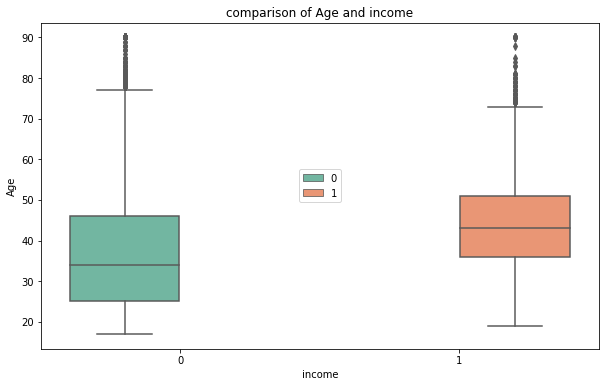

In [344]:
import seaborn as sn
plt.figure(figsize=(10, 6))
plt.title('comparison of Age and income')
sn.boxplot(data = adult, x="income", y="Age", hue = 'income', palette = "Set2")
plt.legend(loc ='center')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

income >50k is 1 and <=50k is 0 which was convereted in previous step


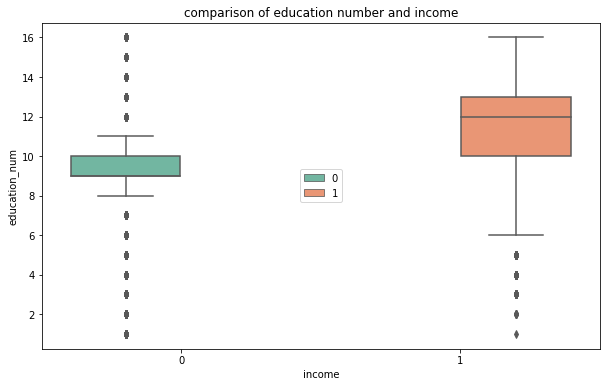

In [343]:
plt.figure(figsize=(10, 6))
plt.title('comparison of education number and income')
sn.boxplot(data = adult, x="income", y="education_num", hue = 'income', palette = "Set2")
plt.legend(loc ='center')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

income >50k is 1 and <=50k is 0 which was convereted in previous step


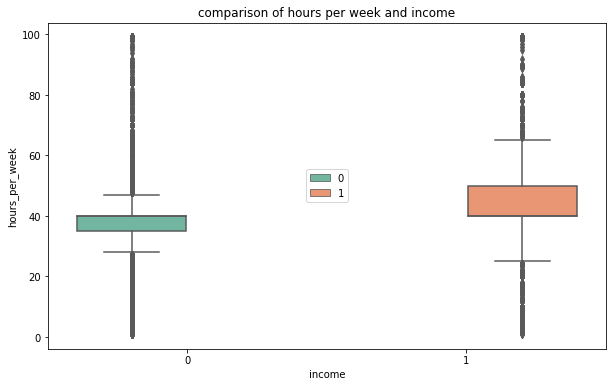

In [342]:
plt.figure(figsize=(10, 6))
plt.title('comparison of hours per week and income')
sn.boxplot(data = adult, x="income", y="hours_per_week", hue = 'income', palette = "Set2")
plt.legend(loc ='center')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

income >50k is 1 and <=50k is 0 which was convereted in previous step


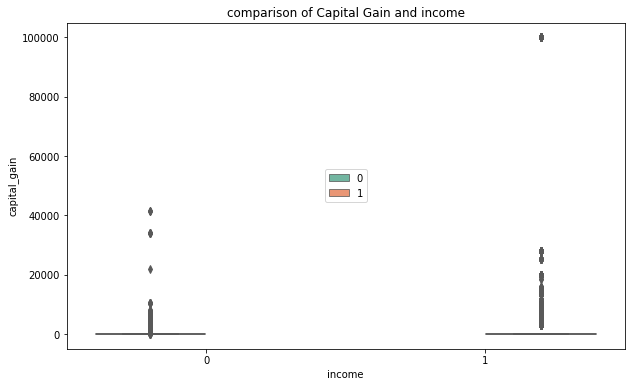

In [346]:
plt.figure(figsize=(10, 6))
plt.title('comparison of Capital Gain and income')
sn.boxplot(data = adult, x="income", y="capital_gain", hue = 'income', palette = "Set2")
plt.legend(loc ='center')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

income >50k is 1 and <=50k is 0 which was convereted in previous step


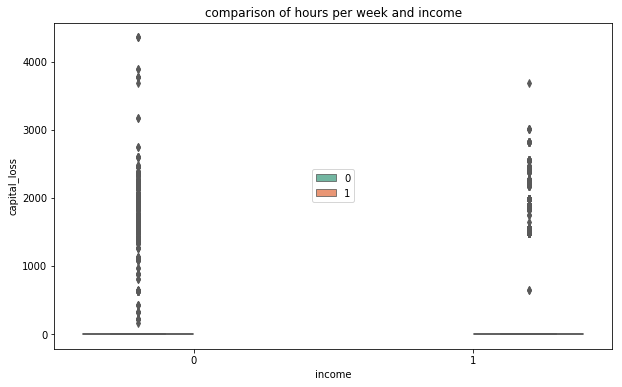

In [347]:
plt.figure(figsize=(10, 6))
plt.title('comparison of hours per week and income')
sn.boxplot(data = adult, x="income", y="capital_loss", hue = 'income', palette = "Set2")
plt.legend(loc ='center')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

In [332]:
"""From the boxplots it can be seen that the range of attribute values for age, education number and hrs_per_week (worked) is slightly higher in >50K class indicating that these attributes may have predictive significance."""

'From the boxplots it can be seen that the range of attribute values for age, education number and hrs_per_week (worked) is slightly higher in >50K class indicating that these attributes may have predictive significance.'

income >50k is 1 and <=50k is 0 which was convereted in previous step


<Figure size 720x504 with 0 Axes>

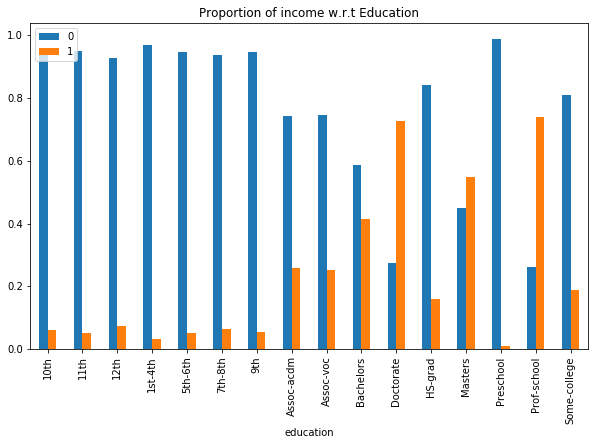

In [460]:
ax = pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0,2)
plt.figure(figsize= (10,7))
ax.plot(kind = 'bar', figsize= (10,6), title = 'Proportion of income w.r.t Education')
ax.set_xlabel = 'Education'
plt.legend(loc ='upper left')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

In [459]:
"""we see from the bar graph below that as the education level increase, the proportion of people who earn more than 50k a year also increase. It is interesting to note that only after a master's degree, the proportion of people earning more than 50k a year, is a majority"""

"we see from the bar graph below that as the education level increase, the proportion of people who earn more than 50k a year also increase. It is interesting to note that only after a master's degree, the proportion of people earning more than 50k a year, is a majority"

income >50k is 1 and <=50k is 0 which was convereted in previous step


<Figure size 720x504 with 0 Axes>

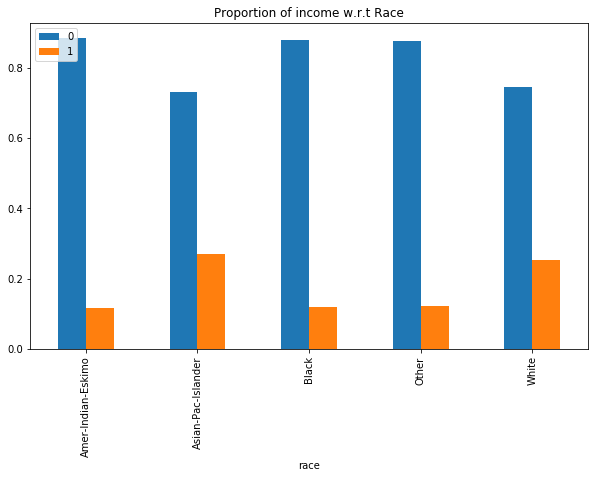

In [454]:
ax = pd.crosstab(adult.race, adult.income).div(pd.crosstab(adult.race, adult.income).apply(sum,1),0,2)
plt.figure(figsize= (10,7))
ax.plot(kind = 'bar', figsize= (10,6), title = 'Proportion of income w.r.t Race')
ax.set_xlabel = 'Race'
plt.legend(loc ='upper left')

print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

income >50k is 1 and <=50k is 0 which was convereted in previous step


<Figure size 720x504 with 0 Axes>

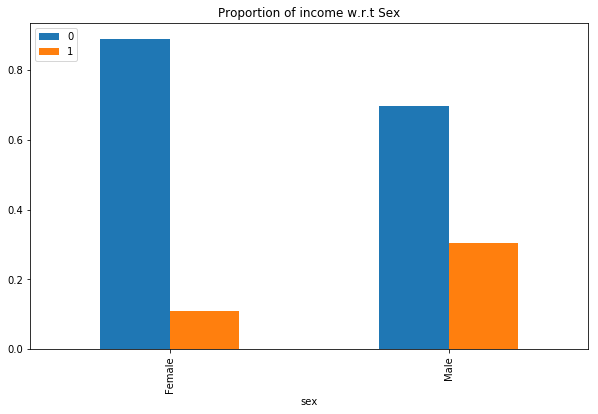

In [455]:
ax = pd.crosstab(adult.sex, adult.income).div(pd.crosstab(adult.sex, adult.income).apply(sum,1),0,2)
plt.figure(figsize= (10,7))
ax.plot(kind = 'bar', figsize= (10,6), title = 'Proportion of income w.r.t Sex')
ax.set_xlabel = 'Sex'
plt.legend(loc ='upper left')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

income >50k is 1 and <=50k is 0 which was convereted in previous step


<Figure size 720x504 with 0 Axes>

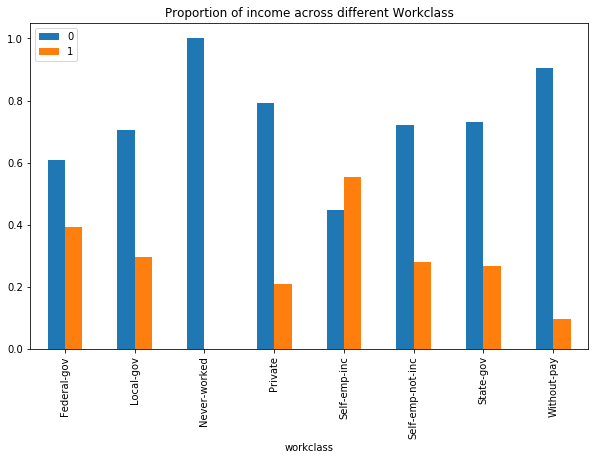

In [457]:
ax = pd.crosstab(adult.workclass, adult.income).div(pd.crosstab(adult.workclass, adult.income).apply(sum,1),0,2)
plt.figure(figsize= (10,7))
ax.plot(kind = 'bar', figsize= (10,6), title = 'Proportion of income across different Workclass')
ax.set_xlabel = 'Workclass'
plt.legend(loc ='upper left')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

income >50k is 1 and <=50k is 0 which was convereted in previous step


<Figure size 720x504 with 0 Axes>

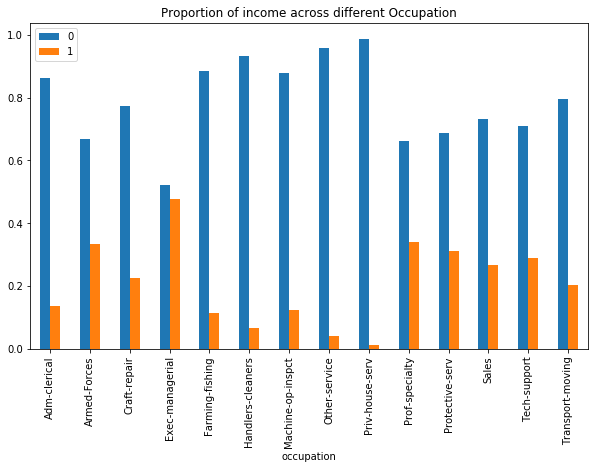

In [461]:
ax = pd.crosstab(adult.occupation, adult.income).div(pd.crosstab(adult.occupation, adult.income).apply(sum,1),0,2)
plt.figure(figsize= (10,7))
ax.plot(kind = 'bar', figsize= (10,6), title = 'Proportion of income across different Occupation')
ax.set_xlabel = 'Occupation'
plt.legend(loc ='upper left')
print('income >50k is 1 and <=50k is 0 which was convereted in previous step')

In [357]:
print('Correlation Matrix')

display(adult.corr())

print('We see that none of the numeric columns are highly correlated.')

Correlation Matrix


,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
Age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


We see that none of the numeric columns are highly correlated.


In [469]:
"""Normalization and Train and Test Split the data for Model Training and development"""

'Normalization and Train and Test Split the data for Model Training and development'

In [495]:
x = np.array(adult_.drop(['income'], 1))
y = np.array(adult_['income'])
y = y.reshape(-1,1)

In [488]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [496]:
scaler.fit_transform(x)

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.99512893,  0.35167453, -1.19725891, ...,  0.3048461 ,
        -0.04199864, -0.02170548],
       [-0.04694151, -0.94552415, -0.41933527, ...,  0.3048461 ,
        -0.04199864, -0.02170548],
       [-0.77631645,  1.3947231 ,  0.74755018, ...,  0.3048461 ,
        -0.04199864, -0.02170548],
       ...,
       [ 1.41180837, -0.35751025, -0.41933527, ...,  0.3048461 ,
        -0.04199864, -0.02170548],
       [-1.21394141,  0.11198424, -0.41933527, ...,  0.3048461 ,
        -0.04199864, -0.02170548],
       [ 0.97418341,  0.93049361, -0.41933527, ...,  0.3048461 ,
        -0.04199864, -0.02170548]])

In [497]:
scaler.fit_transform(y)

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.56084505],
       [-0.56084505],
       [ 1.78302368],
       ...,
       [-0.56084505],
       [-0.56084505],
       [ 1.78302368]])

In [501]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [507]:
"""Lets evaluate train the data with various models and compare the output for the best model.At first I have used logistic regression"""

'Lets evaluate train the data with various models and compare the output for the best model.At first I have used logistic regression'

In [506]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

ln = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

ln.fit(x_train, y_train)
y_pred = ln.predict(x_test)

#Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5116 2395]
 [ 290 1968]]
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      7511
           1       0.45      0.87      0.59      2258

   micro avg       0.73      0.73      0.73      9769
   macro avg       0.70      0.78      0.69      9769
weighted avg       0.83      0.73      0.75      9769

The Accuracy for Logistic Regression is 0.7251509878186099


In [509]:
"""Now next I will train the model using Decision Tree"""

'Now next I will train the model using Decision Tree'

In [508]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier( max_depth = 4 )

clf_tree.fit(x_train, y_train )
tree_predict = clf_tree.predict(x_test)
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
print("The Accuracy for Decision Tree Model is {}".format(DTA))

[[7063  448]
 [1006 1252]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7511
           1       0.74      0.55      0.63      2258

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

The Accuracy for Decision Tree Model is 0.8511618384686253


In [517]:
random_forest = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)
metrics.accuracy_score( y_test, random_forest_pred)

print(confusion_matrix(y_test,random_forest_pred))
print(classification_report(y_test,random_forest_pred))
RFA = accuracy_score(y_test, random_forest_pred)
print("The Accuracy for Random Forest Model is {}".format(RFA))

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[7134  377]
 [ 976 1282]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7511
           1       0.77      0.57      0.65      2258

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.83      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769

The Accuracy for Random Forest Model is 0.8615006653700481


In [519]:
"""From the above I conclude that Random Forest Classification Method gives the best accuracy for the prediction of the Income"""

'From the above I conclude that Random Forest Classification Method gives the best accuracy for the prediction of the Income'